## Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras import backend as K
from keras.models import Model
from keras.preprocessing import image
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image

In [2]:
model = VGG16(weights='imagenet', include_top=True)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [99]:
img_path = 'images/toilet_tissue.jpg'
img = image.load_img(img_path, target_size=(224, 224))
print(img)
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = preprocess_input(x)
print(x.shape)

<PIL.Image.Image image mode=RGB size=224x224 at 0x2B4809BEC18>
(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


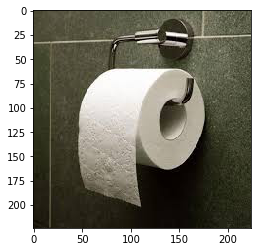

In [34]:
plt.imshow(img);

In [29]:
prediction = model.predict(x)

In [30]:
decode_predictions(prediction)

[[('n15075141', 'toilet_tissue', 0.9979096),
  ('n03887697', 'paper_towel', 0.0020898755),
  ('n04447861', 'toilet_seat', 3.732441e-07),
  ('n04254120', 'soap_dispenser', 3.1401704e-08),
  ('n04553703', 'washbasin', 2.8021779e-08)]]

In [36]:
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('block4_conv3').output)

In [37]:
intermediate_output = intermediate_layer_model.predict(x)

In [40]:
print("Shape of output from block4_conv3: ", intermediate_output.shape)

Shape of output from block4_conv3:  (1, 28, 28, 512)


In [48]:
intermediate_output[0].shape

(28, 28, 512)

In [85]:
intermediate_output[0][:,:,0].shape

(28, 28)

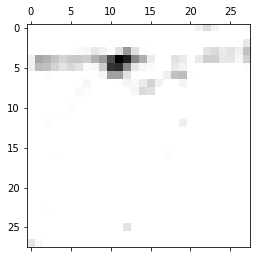

In [87]:
plt.matshow(intermediate_output[0][:,:,0].reshape((28,28)), cmap='Greys')

In [78]:
intermediate_output[0][:,:,:1].reshape((28,28)).shape

(28, 28)

In [88]:
intermediate_layer_model1 = Model(inputs=model.input,
                                 outputs=model.get_layer('block1_conv2').output)

In [100]:
intermediate_output1 = intermediate_layer_model1.predict(x)

In [101]:
print("Shape of output from block4_conv3: ", intermediate_output1.shape)

Shape of output from block4_conv3:  (1, 224, 224, 64)


In [102]:
intermediate_output1[0][:,:,0].shape

(224, 224)

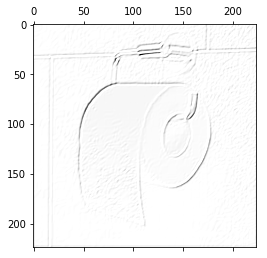

In [103]:
plt.matshow(intermediate_output1[0][:,:,0], cmap='Greys')

In [104]:
intermediate_layer_model0 = Model(inputs=model.input,
                                 outputs=model.get_layer('block1_conv1').output)

In [105]:
intermediate_output0 = intermediate_layer_model1.predict(x)

In [106]:
print("Shape of output from block4_conv3: ", intermediate_output1.shape)

Shape of output from block4_conv3:  (1, 224, 224, 64)


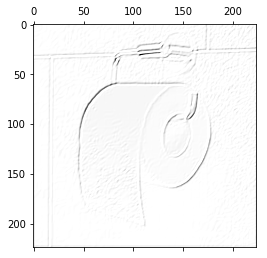

In [107]:
plt.matshow(intermediate_output1[0][:,:,0], cmap='Greys')

In [108]:
from keract import get_activations

In [115]:
activations1 = get_activations(model, x)

In [117]:
from keract import display_activations

input_1:0 (224, 224, 3) -> Skipped. First dimension is not 1.
block1_conv1/Relu:0 (1, 224, 224, 64) 


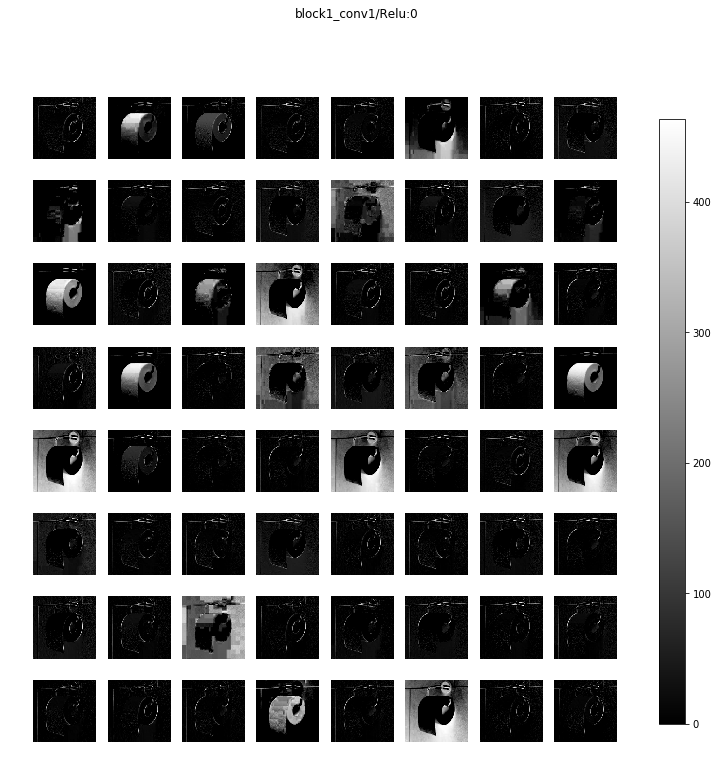

block1_conv2/Relu:0 (1, 224, 224, 64) 


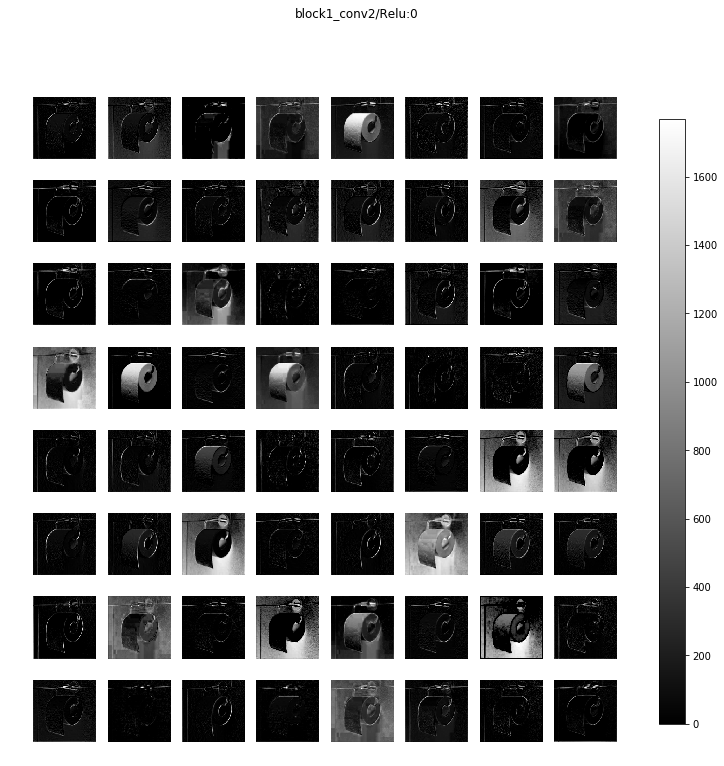

block1_pool/MaxPool:0 (1, 112, 112, 64) 


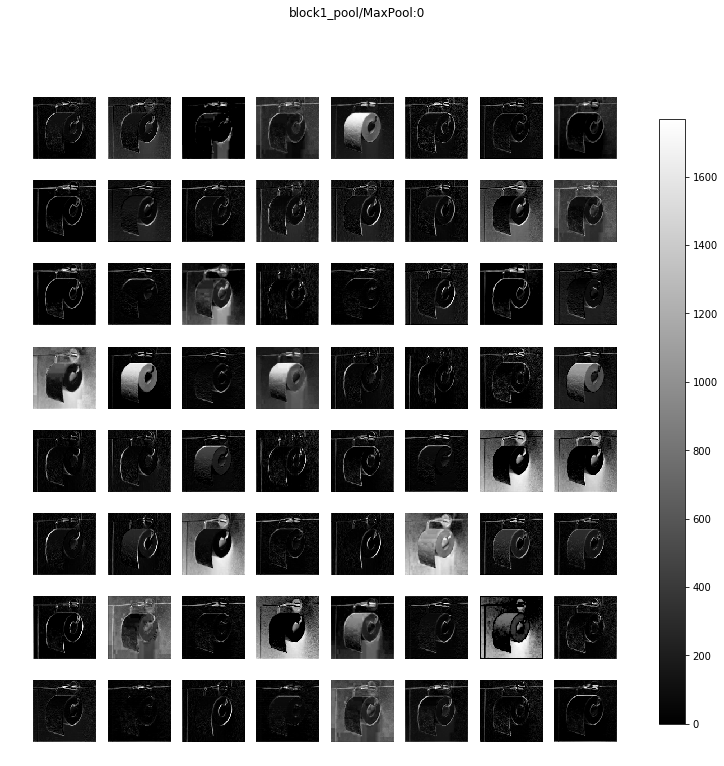

block2_conv1/Relu:0 (1, 112, 112, 128) 


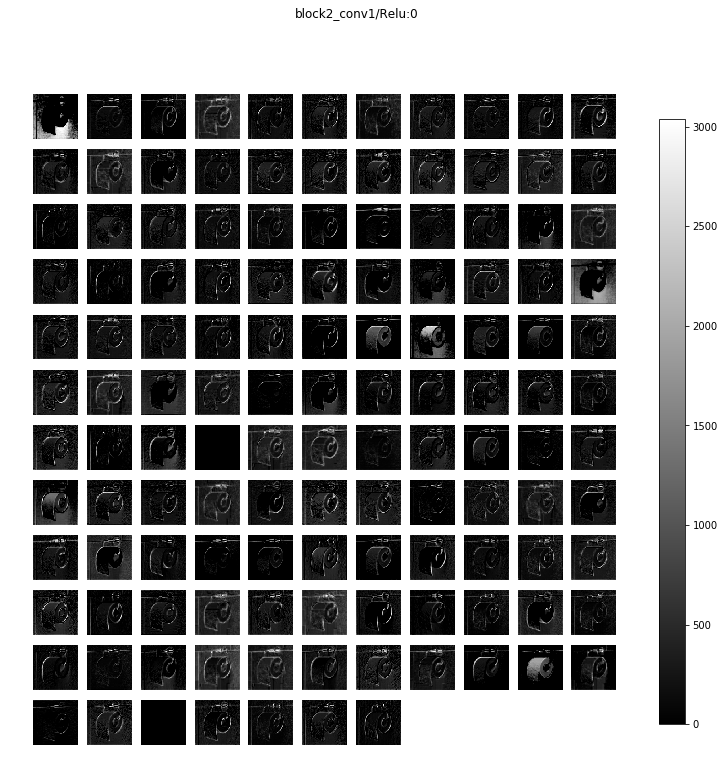

block2_conv2/Relu:0 (1, 112, 112, 128) 


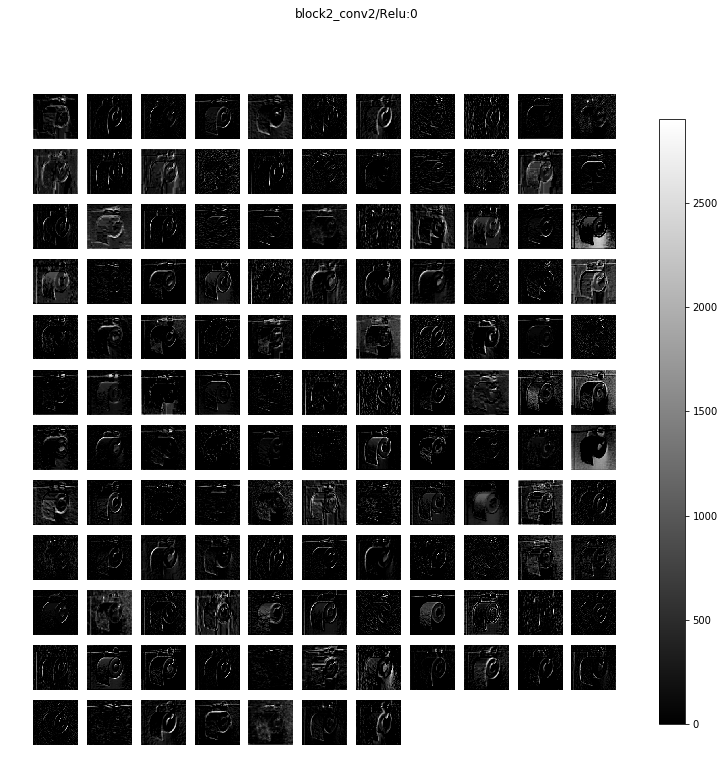

block2_pool/MaxPool:0 (1, 56, 56, 128) 


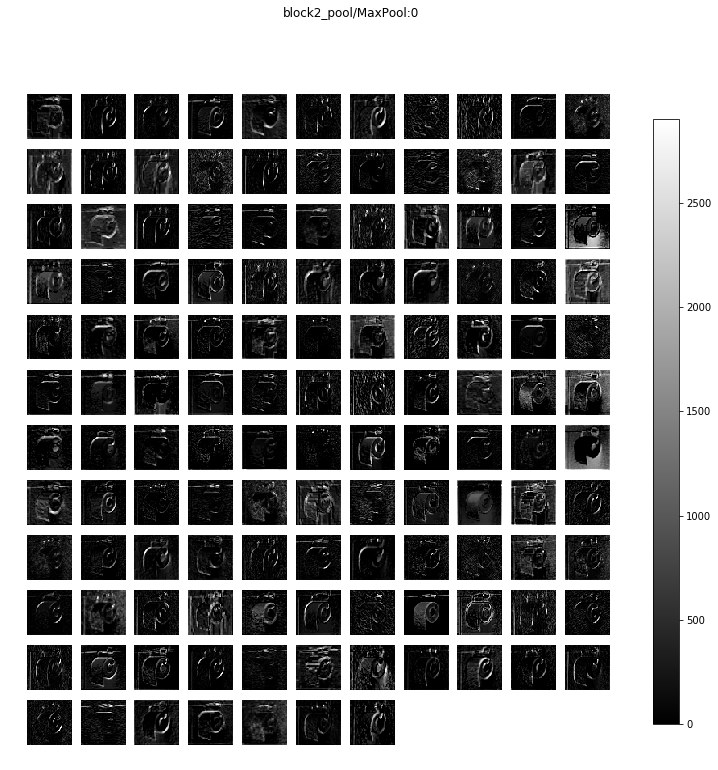

block3_conv1/Relu:0 (1, 56, 56, 256) 


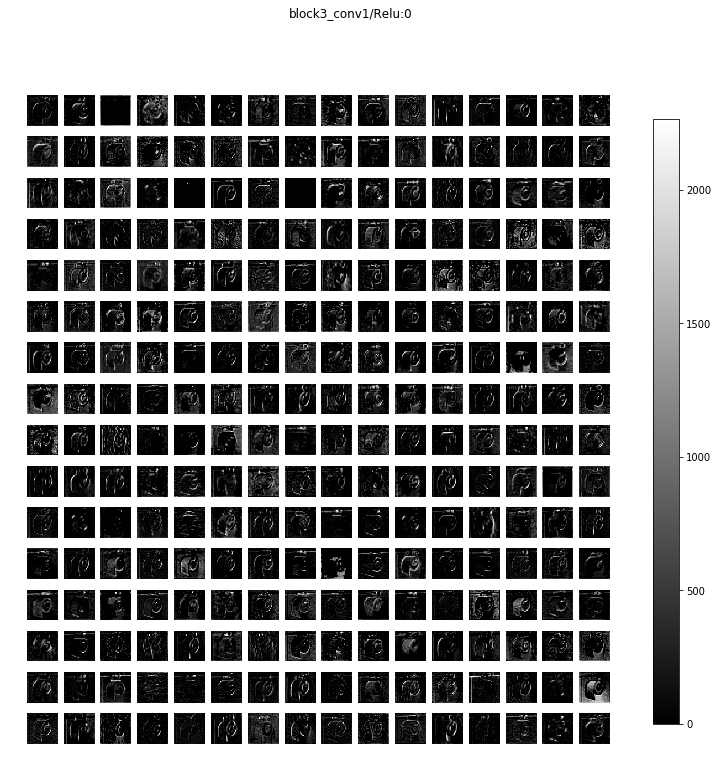

block3_conv2/Relu:0 (1, 56, 56, 256) 


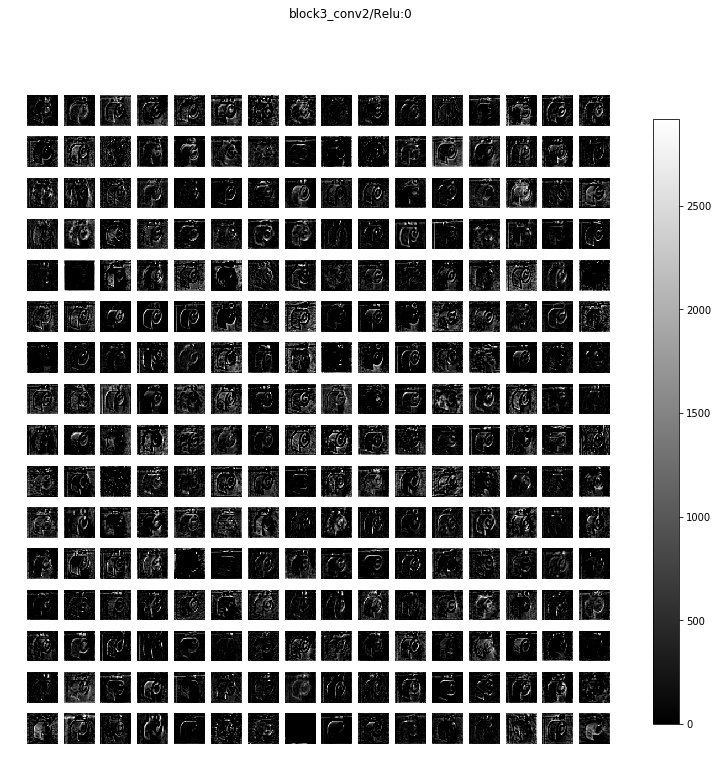

block3_conv3/Relu:0 (1, 56, 56, 256) 


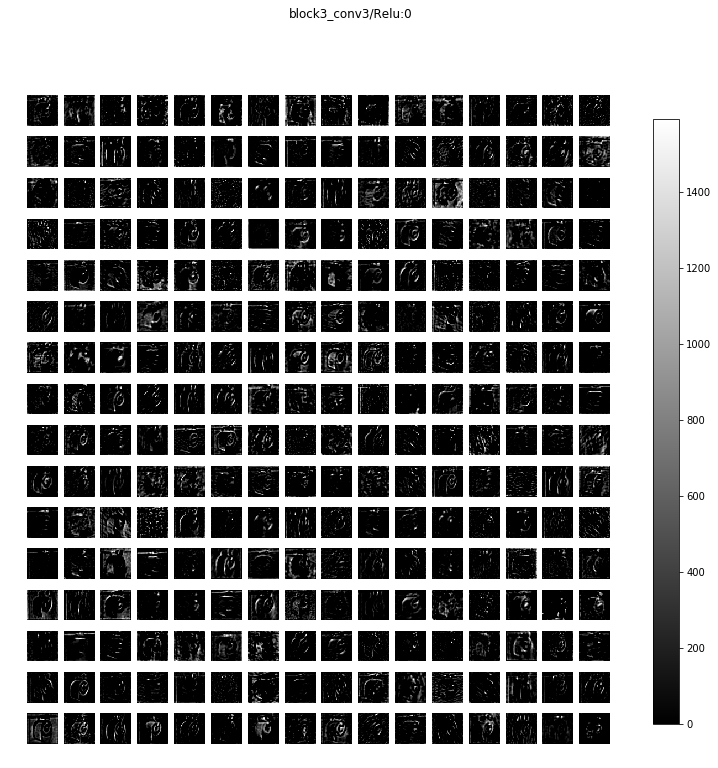

block3_pool/MaxPool:0 (1, 28, 28, 256) 


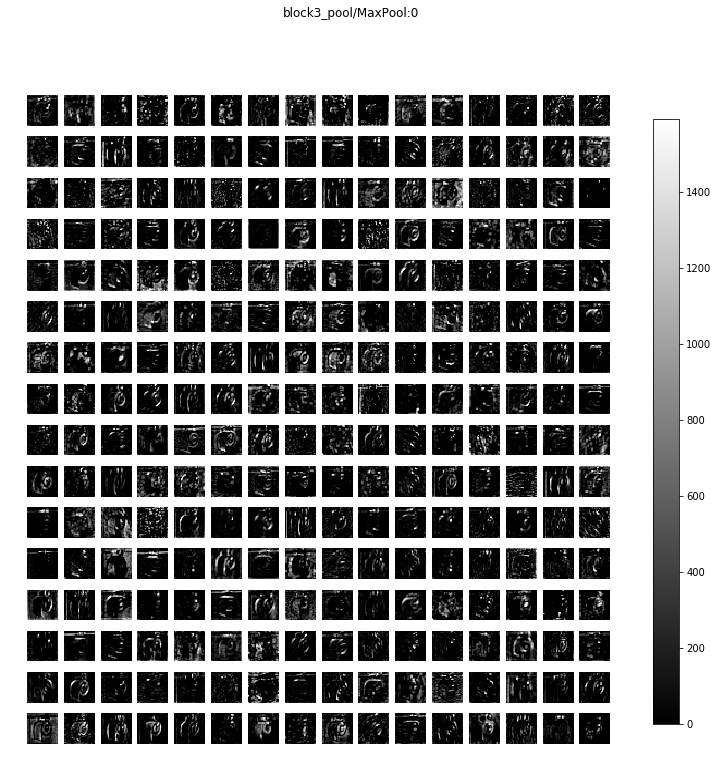

block4_conv1/Relu:0 (1, 28, 28, 512) 


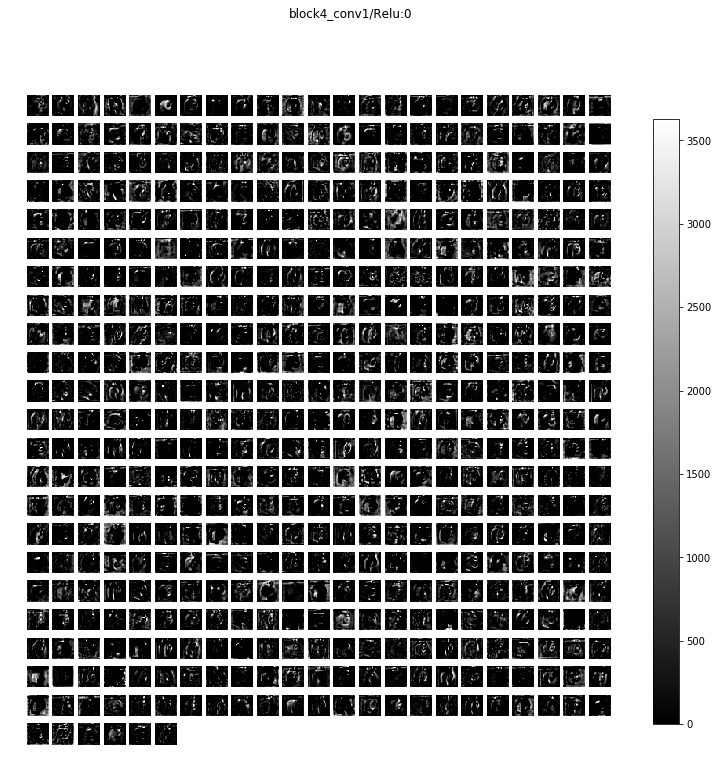

block4_conv2/Relu:0 (1, 28, 28, 512) 


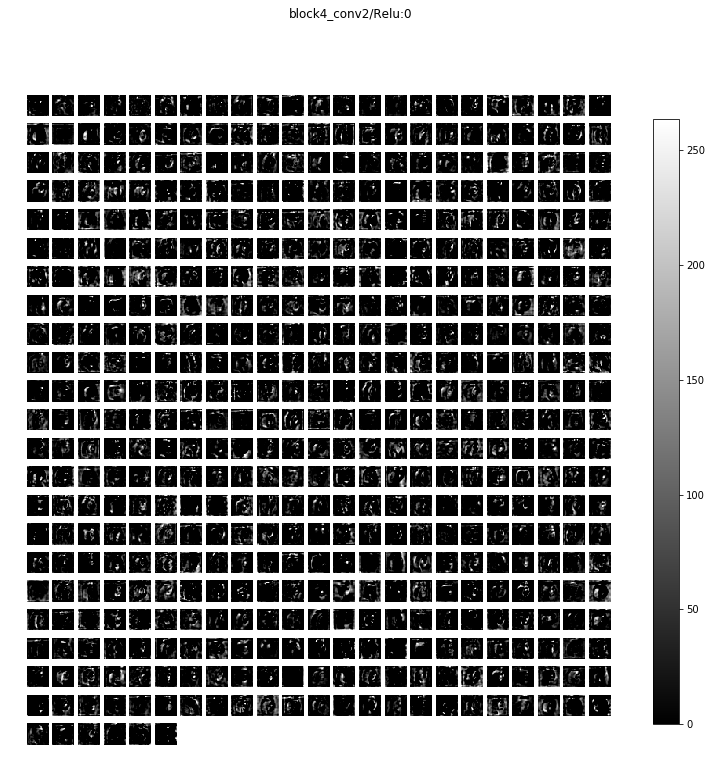

block4_conv3/Relu:0 (1, 28, 28, 512) 


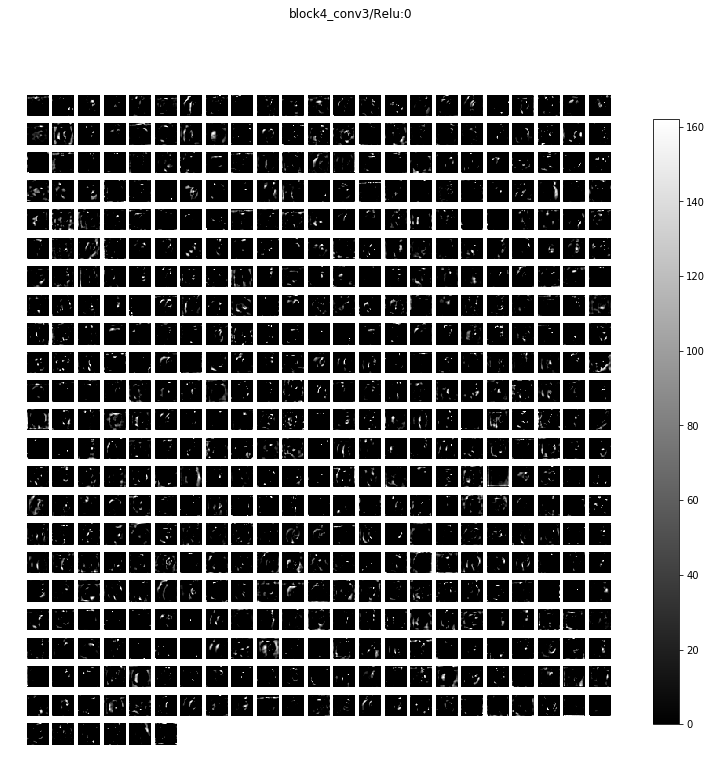

block4_pool/MaxPool:0 (1, 14, 14, 512) 


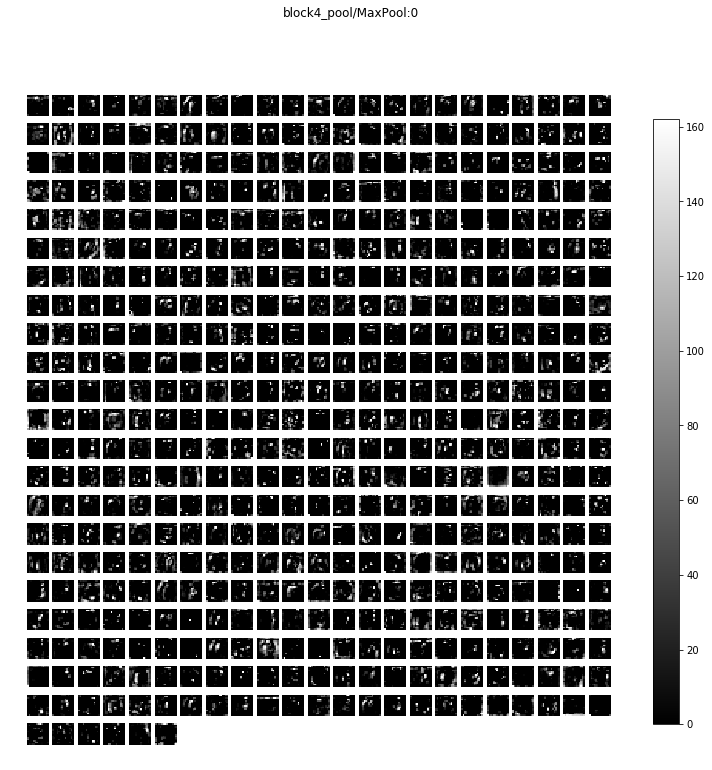

block5_conv1/Relu:0 (1, 14, 14, 512) 


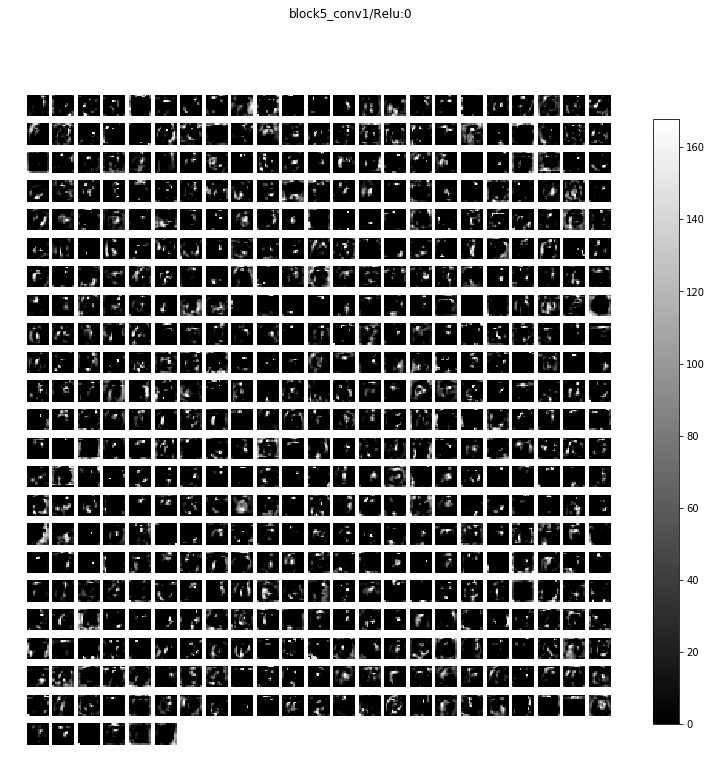

block5_conv2/Relu:0 (1, 14, 14, 512) 


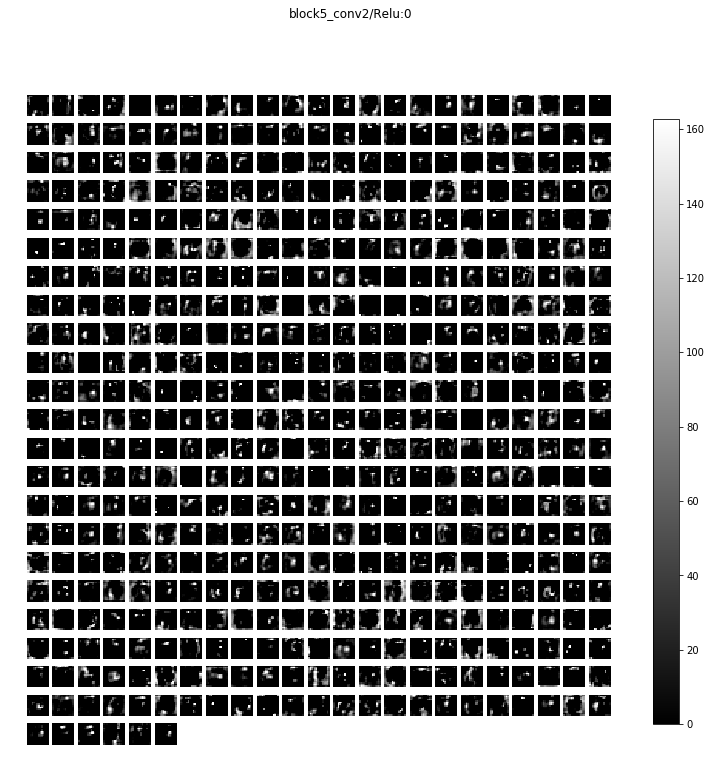

block5_conv3/Relu:0 (1, 14, 14, 512) 


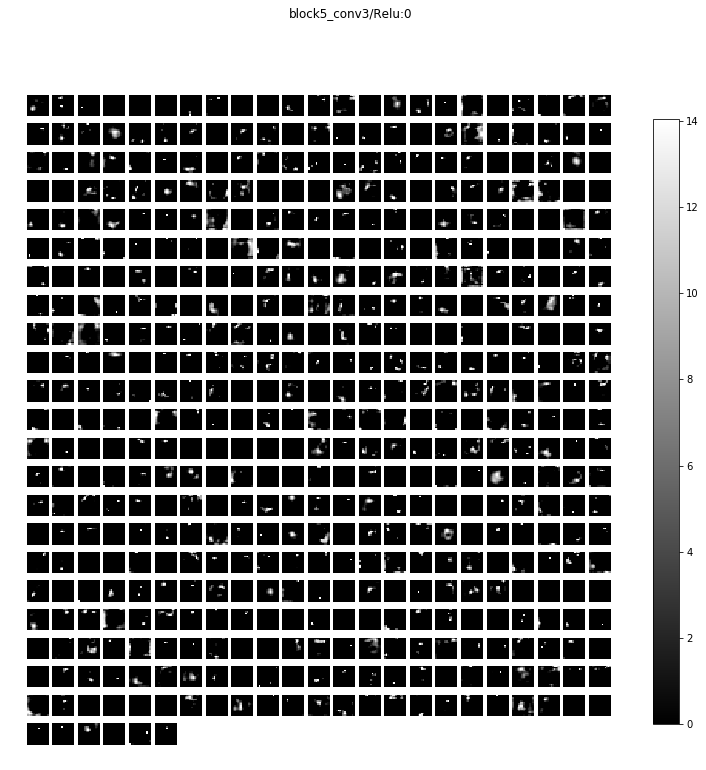

block5_pool/MaxPool:0 (1, 7, 7, 512) 


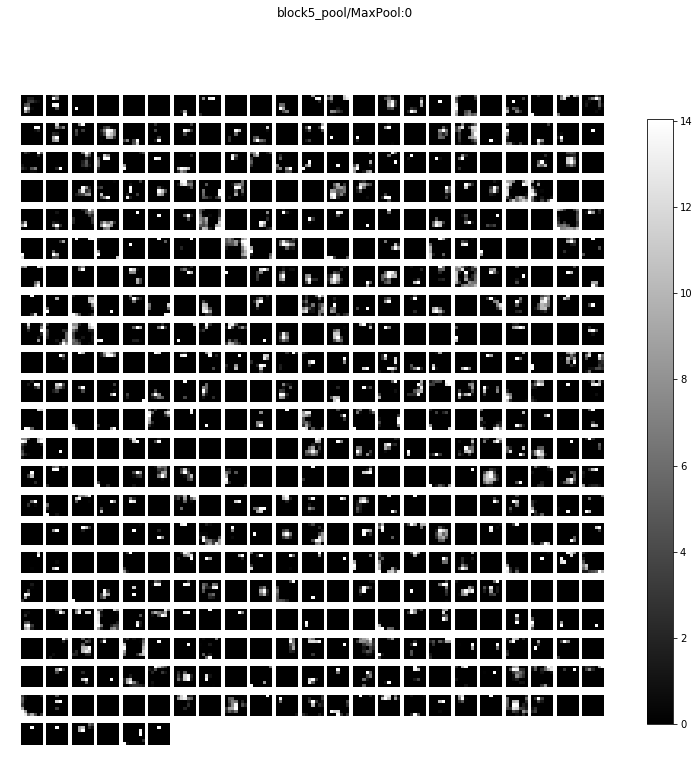

flatten/Reshape:0 (1, 25088) -> Skipped. 2D Activations.
fc1/Relu:0 (1, 4096) -> Skipped. 2D Activations.
fc2/Relu:0 (1, 4096) -> Skipped. 2D Activations.
predictions/Softmax:0 (1, 1000) -> Skipped. 2D Activations.


In [118]:
display_activations(activations1, cmap="gray", save=False)

## Block 1

In [119]:
activations = get_activations(model, x, 'block1_conv2')

In [121]:
activations

{'block1_conv2/Relu:0': array([[[[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00,  9.83569870e+01],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00,  7.58073959e+01],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00,  5.06301193e+01,  3.11338997e+01],
          ...,
          [ 2.56076756e+01, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00,  1.21203400e+02,  8.46256866e+01],
          [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00,  1.00137947e+02],
          [ 1.70692215e+02,  2.81164627e+01, -0.00000000e+00, ...,
           -0.00000000e+00,  1.54957169e+02,  4.54986382e+01]],
 
         [[ 5.64823437e+00, -0.00000000e+00, -0.00000000e+00, ...,
           -0.00000000e+00, -0.00000000e+00,  2.38410721e+01],
          [ 2.66014587e+02,  2.75231964e+02, -0.0

block1_conv2/Relu:0 (1, 224, 224, 64) 


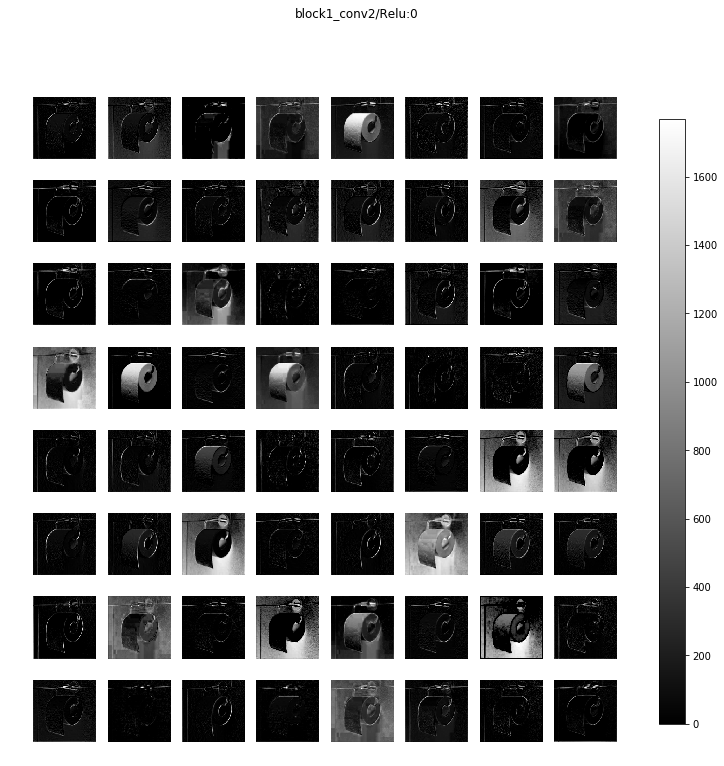

In [120]:
display_activations(activations, cmap="gray", save=False)

In [ ]:
plt.matshow(intermediate_output[0][:,:,0].reshape((28,28)), cmap='Greys')